In [1]:
# General Data Processing and Visualization Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
# Specific Models for Testing
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Visualization Tools
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def make_vis(model_clf,train,val):
  viz = ClassificationReport(model_clf, classes=['0', '1'], support = True)
  viz.fit(train, np.ravel(label_train))
  viz.score(val, np.ravel(label_val))
  viz.poof()

def make_cmatrix(predictions,clf_name):
  cm = confusion_matrix(label_val, predictions)
  cm_display = ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
  cm_display.plot(values_format='d')
  plt.title("Confusion Matrix: "+clf_name)
  plt.grid(False)
  plt.show()

In [4]:
data_raw = pd.read_csv('../data/creditcard.csv', sep=",")

In [5]:
data_only = data_raw.drop(["Class"],axis=1)
labels_only = data_raw.take([-1],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
train_raw, val_raw, label_train, label_val = train_test_split(data_only, labels_only,\
                                                                stratify=labels_only,\
                                                                test_size = 0.2,\
                                                               random_state = 255)

## D-tree

In [7]:
d_tree = DecisionTreeClassifier(random_state=255).fit(train_raw,np.ravel(label_train))


prediction_d = d_tree.predict(val_raw)
print(classification_report(np.ravel(label_val), prediction_d))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.81      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


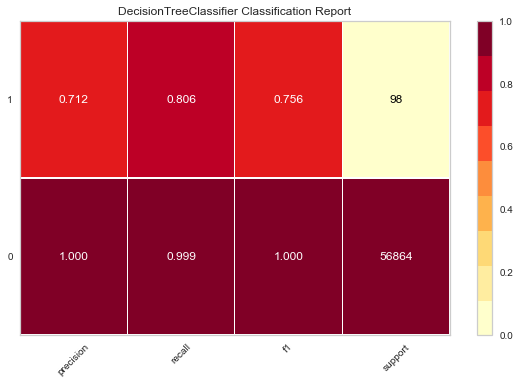

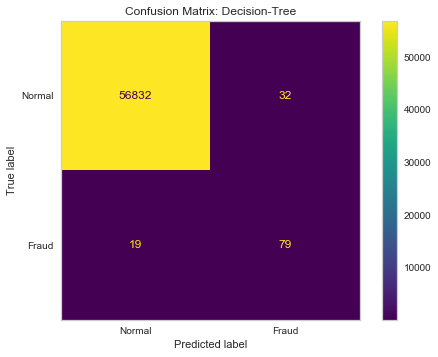

In [8]:
make_vis(d_tree,train_raw,val_raw)
make_cmatrix(prediction_d,"Decision-Tree")

## D-tree Auto

In [9]:
d_tree_a = DecisionTreeClassifier(random_state=255, max_features = 'auto').fit(train_raw,np.ravel(label_train))


prediction_da = d_tree_a.predict(val_raw)
print(classification_report(np.ravel(label_val), prediction_da))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.73      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


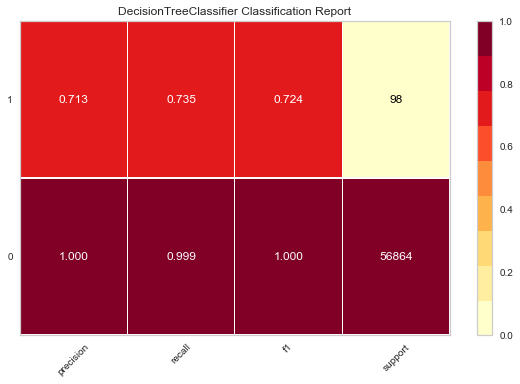

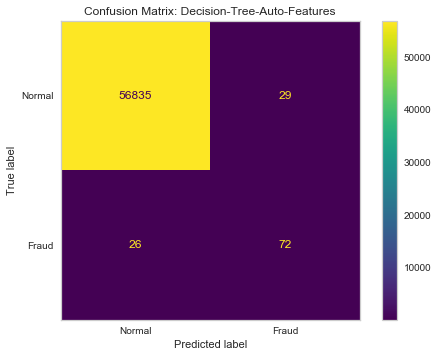

In [10]:
make_vis(d_tree_a,train_raw,val_raw)
make_cmatrix(prediction_da,"Decision-Tree-Auto-Features")

## D-tree balanced

In [11]:
d_tree_b = DecisionTreeClassifier(random_state=255, class_weight='balanced').fit(train_raw,np.ravel(label_train))


prediction_db = d_tree_b.predict(val_raw)
print(classification_report(np.ravel(label_val), prediction_db))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.73      0.76        98

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


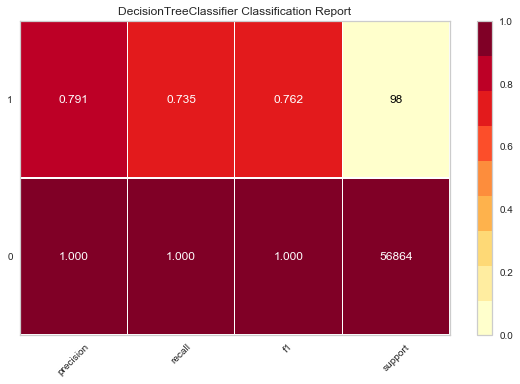

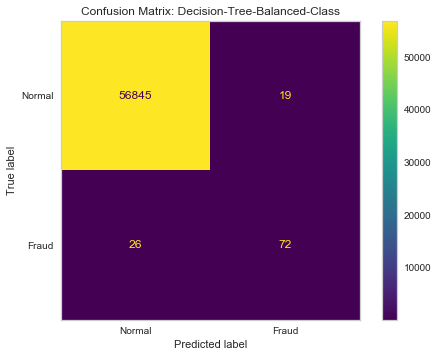

In [12]:
make_vis(d_tree_b,train_raw,val_raw)
make_cmatrix(prediction_db,"Decision-Tree-Balanced-Class")

## D-tree auto balanced

In [13]:
d_tree_ab = DecisionTreeClassifier(random_state=255, class_weight='balanced', max_features = 'auto').fit(train_raw,np.ravel(label_train))


prediction_dab = d_tree_ab.predict(val_raw)
print(classification_report(np.ravel(label_val), prediction_dab))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.81      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


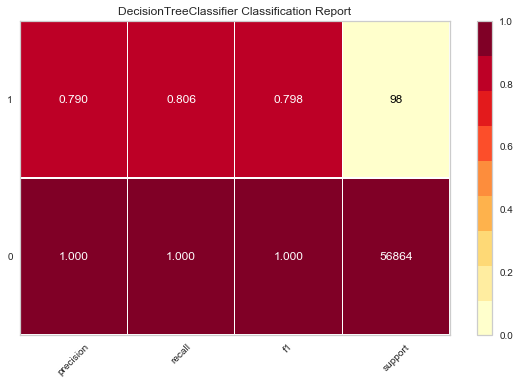

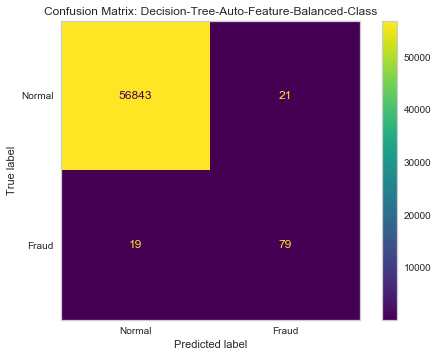

In [14]:
make_vis(d_tree_ab,train_raw,val_raw)
make_cmatrix(prediction_dab,"Decision-Tree-Auto-Feature-Balanced-Class")

## Check how preprocessing effects results

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_raw)
scaled_train = scaler.transform(train_raw)
scaled_val = scaler.transform(val_raw)

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
minmax_train = minmaxScaler.fit_transform(train_raw)
minmax_val = minmaxScaler.transform(val_raw)

### D-tree Scaled

In [16]:
d_tree_s = DecisionTreeClassifier(random_state=255).fit(scaled_train,np.ravel(label_train))


prediction_d_s = d_tree_s.predict(scaled_val)
print(classification_report(np.ravel(label_val), prediction_d_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.81      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


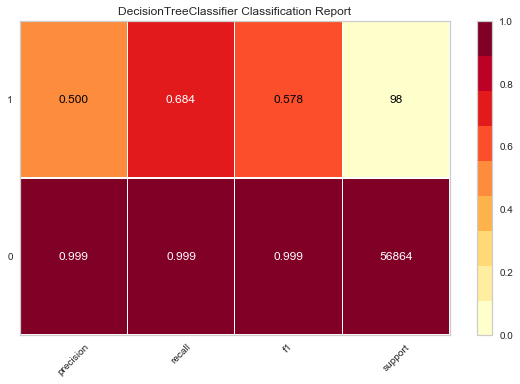

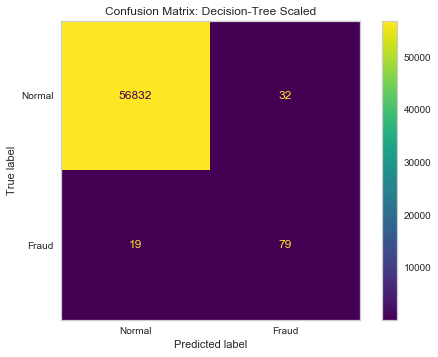

In [17]:
make_vis(d_tree,scaled_train,scaled_val)
make_cmatrix(prediction_d,"Decision-Tree Scaled")

In [18]:
d_tree_mm = DecisionTreeClassifier(random_state=255).fit(minmax_train,np.ravel(label_train))

prediction_d_mm = d_tree_mm.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_d_mm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.81      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


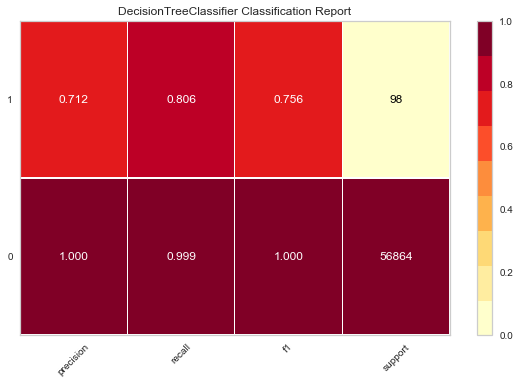

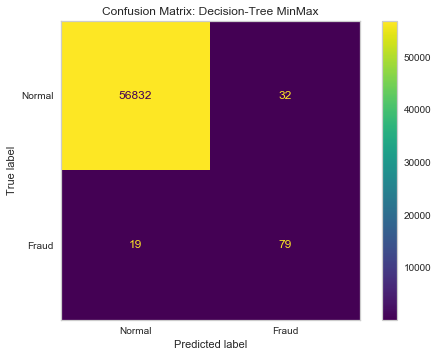

In [19]:
make_vis(d_tree_mm,minmax_train,minmax_val)
make_cmatrix(prediction_d_mm,"Decision-Tree MinMax")

### D-tree Auto Scaled

In [20]:
d_tree_a_s = DecisionTreeClassifier(random_state=255, max_features = 'auto').fit(scaled_train,np.ravel(label_train))

prediction_d_a_s = d_tree_a_s.predict(scaled_val)
print(classification_report(np.ravel(label_val), prediction_d_a_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.73      0.72        98

    accuracy                           1.00     56962
   macro avg       0.86      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


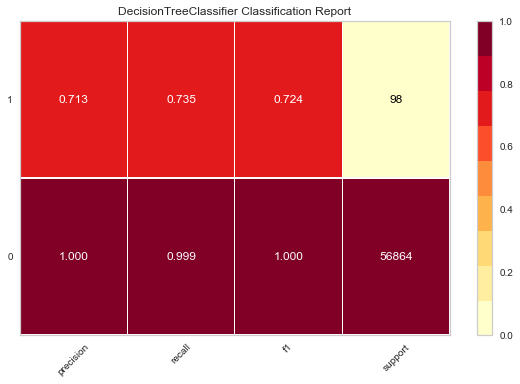

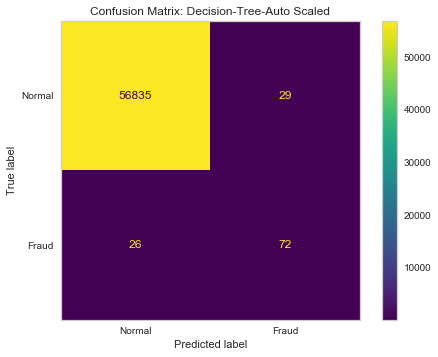

In [21]:
make_vis(d_tree_a_s,scaled_train,scaled_val)
make_cmatrix(prediction_d_a_s,"Decision-Tree-Auto Scaled")

In [22]:
d_tree_a_mm = DecisionTreeClassifier(random_state=255, max_features = 'auto').fit(minmax_train,np.ravel(label_train))

prediction_d_a_mm = d_tree_a_mm.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_d_a_mm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.72      0.73        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


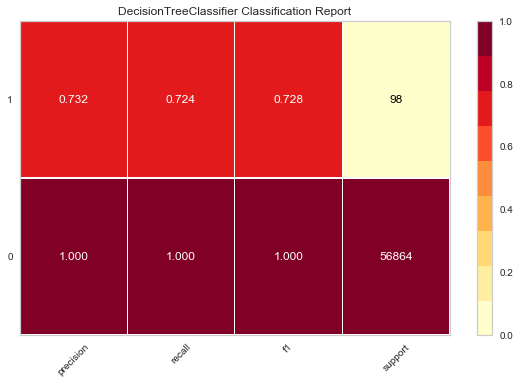

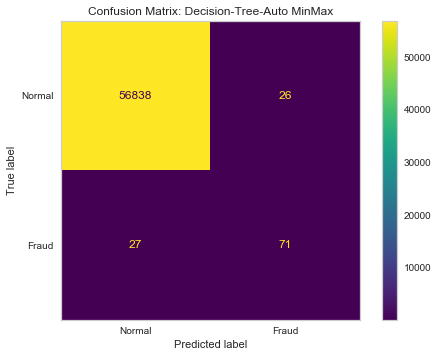

In [23]:
make_vis(d_tree_a_mm,minmax_train,minmax_val)
make_cmatrix(prediction_d_a_mm,"Decision-Tree-Auto MinMax")

### D-Tree Balanced Scaled

In [24]:
d_tree_b_s = DecisionTreeClassifier(random_state=255, class_weight='balanced').fit(scaled_train,np.ravel(label_train))

prediction_d_b_s = d_tree_b_s.predict(scaled_val)
print(classification_report(np.ravel(label_val), prediction_d_b_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.73      0.76        98

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


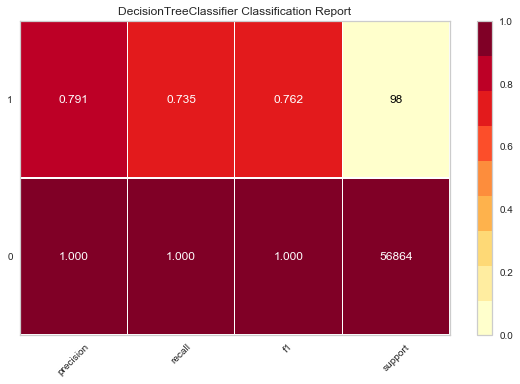

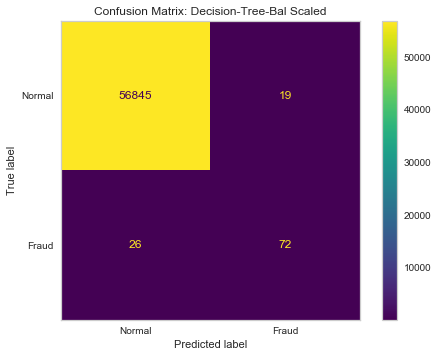

In [25]:
make_vis(d_tree_b_s,scaled_train,scaled_val)
make_cmatrix(prediction_d_b_s,"Decision-Tree-Bal Scaled")

In [26]:
d_tree_b_mm = DecisionTreeClassifier(random_state=255, class_weight='balanced').fit(minmax_train,np.ravel(label_train))

prediction_d_b_mm = d_tree_b_mm.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_d_b_mm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.73      0.76        98

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


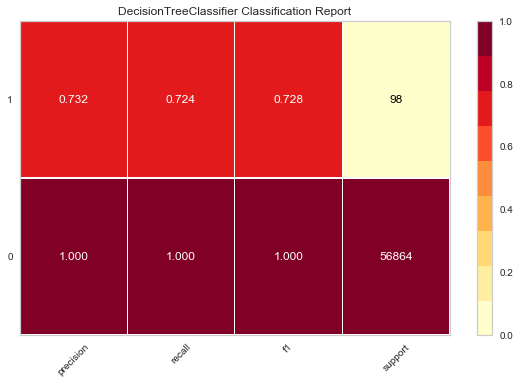

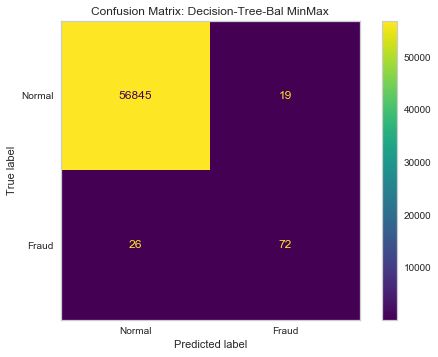

In [27]:
make_vis(d_tree_a_mm,minmax_train,minmax_val)
make_cmatrix(prediction_d_b_mm,"Decision-Tree-Bal MinMax")

## D-Tree Auto Balanced Scaled

In [28]:
d_tree_ab_s = DecisionTreeClassifier(random_state=255, class_weight='balanced', max_features = 'auto').fit(scaled_train,np.ravel(label_train))

prediction_d_ab_s = d_tree_ab_s.predict(scaled_val)
print(classification_report(np.ravel(label_val), prediction_d_ab_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.81      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


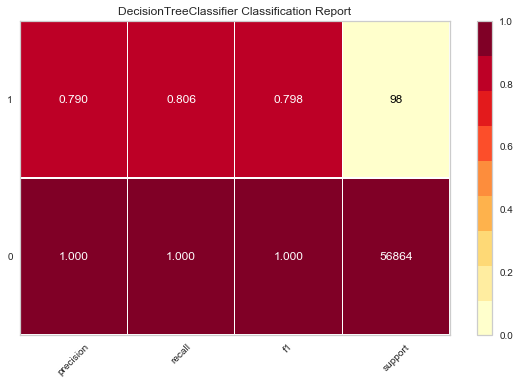

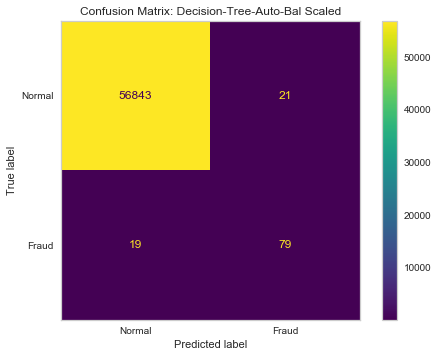

In [29]:
make_vis(d_tree_ab_s,scaled_train,scaled_val)
make_cmatrix(prediction_d_ab_s,"Decision-Tree-Auto-Bal Scaled")

In [30]:
d_tree_ab_mm = DecisionTreeClassifier(random_state=255, class_weight='balanced', max_features = 'auto').fit(minmax_train,np.ravel(label_train))

prediction_d_ab_mm = d_tree_ab_mm.predict(minmax_val)
print(classification_report(np.ravel(label_val), prediction_d_ab_mm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.81      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



/Users/ryshu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


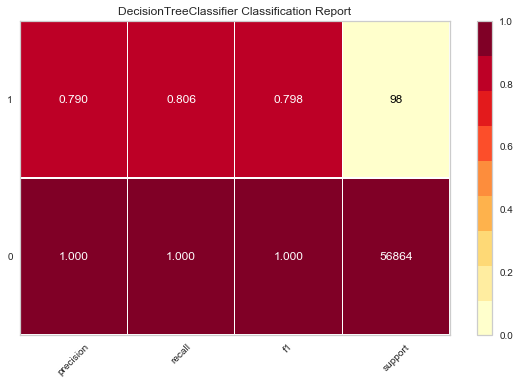

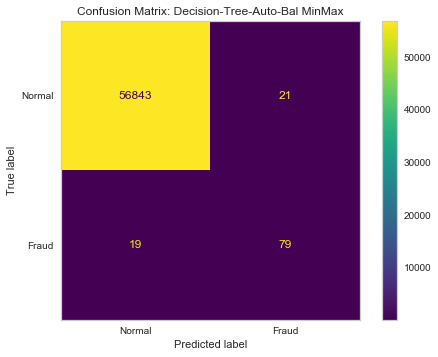

In [31]:
make_vis(d_tree_ab_mm,minmax_train,minmax_val)
make_cmatrix(prediction_d_ab_mm,"Decision-Tree-Auto-Bal MinMax")

# Results

No major differences between results